<a href="https://colab.research.google.com/github/lovelyoyrmia/machine-learning-notebook/blob/main/decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Import dependencies**

In [10]:
import pandas as pd
import seaborn as sns
import sklearn.model_selection as ms
import sklearn.tree as tree
import sklearn.metrics as met

## Load dataset decision tree

In [4]:
df1 = pd.read_csv('decisiontree.csv')

In [5]:
df1.head()

,ID,mesin,bangku,penggerak,label
0,1,bensin,4,depan,sedan
1,2,bensin,2,depan,sedan
2,3,bensin,8,belakang,minibus
3,4,diesel,6,depan,minibus
4,5,bensin,5,belakang,minibus


## Encode mesin and penggerak

In [6]:
encoding = {'mesin': {'bensin': 0, 'diesel': 1}, 'penggerak': {'depan': 0, 'belakang': 1}}
df1.replace(encoding, inplace=True)

In [7]:
df1.head()

,ID,mesin,bangku,penggerak,label
0,1,0,4,0,sedan
1,2,0,2,0,sedan
2,3,0,8,1,minibus
3,4,1,6,0,minibus
4,5,0,5,1,minibus


In [8]:
df1.isnull().sum()

ID           0
mesin        0
bangku       0
penggerak    0
label        0
dtype: int64

In [9]:
X = df1.drop(['ID', 'label'], axis=1)
y = df1['label']

## Split data train, and data test

In [13]:
X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size=0.2)

### Desicion Tree 'Entropy'

In [14]:
model1 = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5)
model1.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [15]:
y_prediksi = model1.predict(X_test)

In [16]:
y_prediksi

array(['minibus', 'sedan', 'sedan', 'minibus', 'sedan', 'sedan',
       'minibus', 'minibus'], dtype=object)

In [17]:
met.accuracy_score(y_test, y_prediksi)

1.0

### Desicion Tree 'Gini'

In [18]:
model2 = tree.DecisionTreeClassifier(criterion='gini', max_depth=5)

In [19]:
model2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [20]:
y_prediksi = model2.predict(X_test)

In [21]:
y_prediksi

array(['minibus', 'sedan', 'sedan', 'minibus', 'sedan', 'sedan',
       'minibus', 'minibus'], dtype=object)

In [22]:
met.accuracy_score(y_test, y_prediksi)

1.0

## Visualization

In [25]:
import pydotplus as pp
labels = ['mesin', 'bangku', 'penggerak']
dot_data = tree.export_graphviz(model2, out_file=None, feature_names=labels, filled=True, rounded=True)
graph = pp.graph_from_dot_data(dot_data)

In [26]:
graph.write_png('desiciontree.png')

True

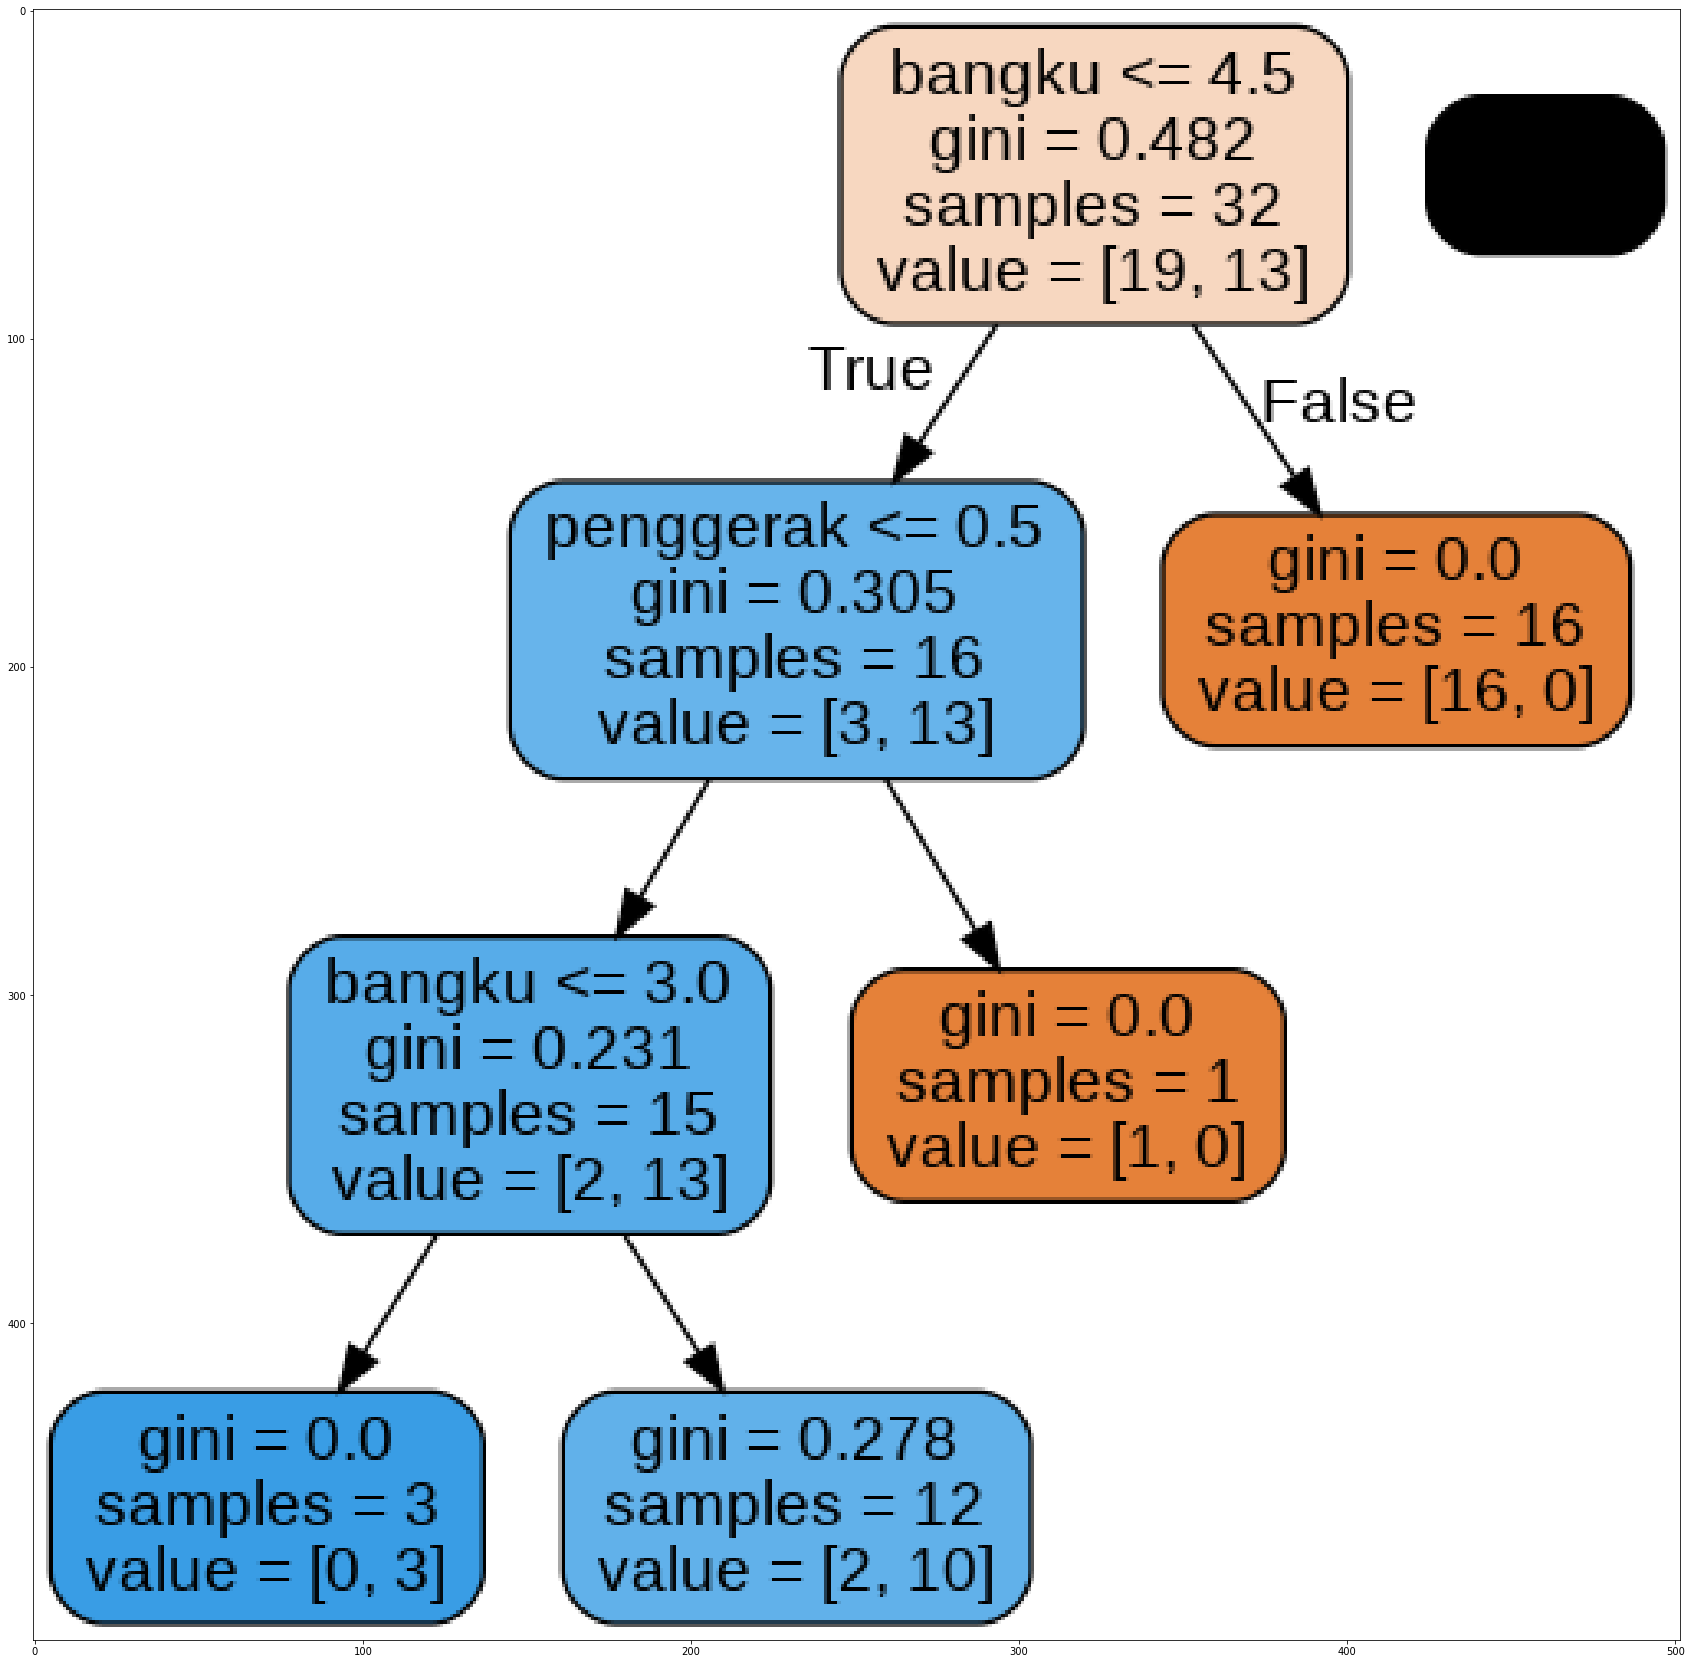

In [36]:
import matplotlib.pyplot as plt
from PIL import Image

imagee = Image.open('desiciontree.png')

plt.figure(figsize=(30, 30))
plt.imshow(imagee)
plt.show()